In [23]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np
# from operators.transformer import MultiHeadedAttention

In [6]:
# a = MultiHeadedAttention(h=8,d_channel=3).to('cuda')

In [3]:
x = torch.randint(0,10,size=(5,6,3,200,200),dtype=torch.float,device='cuda')

In [25]:
cnn=nn.Conv2d(2,1,1,1,0)

In [26]:
print(cnn.weight)
print(cnn.bias)

Parameter containing:
tensor([[[[ 0.0836]],

         [[-0.5952]]]], requires_grad=True)
Parameter containing:
tensor([-0.6034], requires_grad=True)


In [27]:
a = torch.randint(0,2,size=(5,2,5,5),dtype=torch.float)
a[0]

tensor([[[1., 0., 1., 0., 0.],
         [0., 0., 1., 1., 0.],
         [0., 0., 1., 1., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 1., 1., 0., 0.],
         [1., 0., 1., 0., 1.],
         [1., 0., 1., 0., 1.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 1.]]])

In [2]:
pe = torch.zeros(5000, 40000)

In [3]:
position = torch.arange(0, 5000, dtype=torch.float).unsqueeze(1)
position

tensor([[0.0000e+00],
        [1.0000e+00],
        [2.0000e+00],
        ...,
        [4.9970e+03],
        [4.9980e+03],
        [4.9990e+03]])

In [4]:
div_term = torch.exp(torch.arange(0, 40000, 2, dtype=torch.float) * -(math.log(10000.0) / 40000))
div_term

tensor([1.0000e+00, 9.9954e-01, 9.9908e-01,  ..., 1.0014e-04, 1.0009e-04,
        1.0005e-04])

In [6]:
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)

In [7]:
pe

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  8.4122e-01,  ...,  1.0000e+00,
          1.0005e-04,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  9.0968e-01,  ...,  1.0000e+00,
          2.0009e-04,  1.0000e+00],
        ...,
        [ 9.5625e-01, -2.9254e-01, -4.1969e-01,  ...,  8.7751e-01,
          4.7936e-01,  8.7762e-01],
        [ 2.7050e-01, -9.6272e-01,  5.3702e-01,  ...,  8.7746e-01,
          4.7945e-01,  8.7757e-01],
        [-6.6395e-01, -7.4778e-01,  9.9999e-01,  ...,  8.7741e-01,
          4.7954e-01,  8.7752e-01]])

In [76]:
div_term.shape

torch.Size([20000])

In [24]:
class PositionalEncoding(nn.Module):
    "Implement the PE function."
    def __init__(self, H, W, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

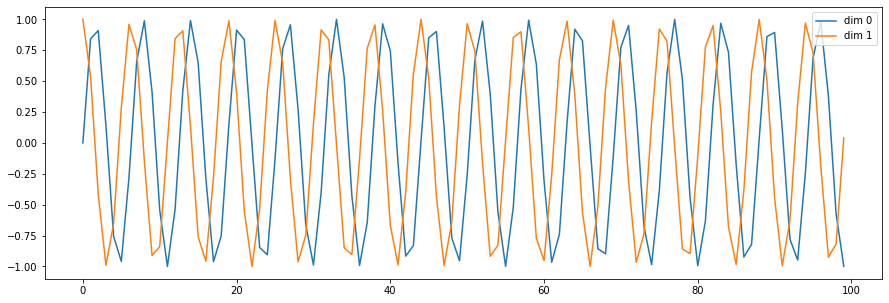

In [29]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(torch.zeros(1, 100, 20))
plt.plot(np.arange(100), y[0, :, 0:2].data.numpy())
plt.legend(["dim %d"%p for p in [0,1,2]])

In [33]:
pe.pe[:,:100].shape

torch.Size([1, 100, 20])

In [34]:
x = torch.rand(5,6,3,100,100)

In [ ]:
x + 